<a href="https://colab.research.google.com/github/hyunBBB/OMG/blob/main/10_Overfitting_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 1s 0us/step


In [3]:
batch_size = 32
img_height = 180
img_width = 180

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
   seed = 1,
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Data augmentation

In [7]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height,  img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)
# 전처리를 위한 레이어 추가하는것임 

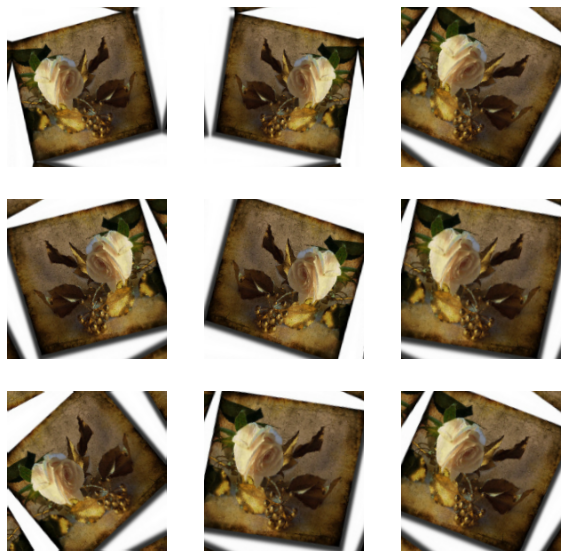

In [8]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    # 로테이션 되어있고 줌도 되어있고 아주 다양하게 변형이 되어있죠 플립도 되어있고
    # 이미지가 다 장미인데 학습할때마다 다양한 장미가 들어가는 것임

In [9]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


BatchNormalization & DropOut

In [10]:
num_classes = 5

model = Sequential([
    
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 90, 90, 32)       

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
92/92 [==============================] - 43s 106ms/step - loss: 5.5329 - accuracy: 0.3230 - val_loss: 1.5584 - val_accuracy: 0.3924
Epoch 2/20
92/92 [==============================] - 9s 96ms/step - loss: 1.3230 - accuracy: 0.4401 - val_loss: 1.6035 - val_accuracy: 0.2861
Epoch 3/20
92/92 [==============================] - 9s 99ms/step - loss: 1.2388 - accuracy: 0.4691 - val_loss: 1.4041 - val_accuracy: 0.4387
Epoch 4/20
92/92 [==============================] - 10s 100ms/step - loss: 1.2454 - accuracy: 0.4782 - val_loss: 1.1228 - val_accuracy: 0.5817
Epoch 5/20
92/92 [==============================] - 9s 99ms/step - loss: 1.2006 - accuracy: 0.4929 - val_loss: 1.0857 - val_accuracy: 0.5450
Epoch 6/20
92/92 [==============================] - 9s 99ms/step - loss: 1.1932 - accuracy: 0.4754 - val_loss: 1.0209 - val_accuracy: 0.6144
Epoch 7/20
92/92 [==============================] - 9s 98ms/step - loss: 1.1019 - accuracy: 0.5430 - val_loss: 0.9670 - val_accuracy: 0.6485
Epoch 8/2

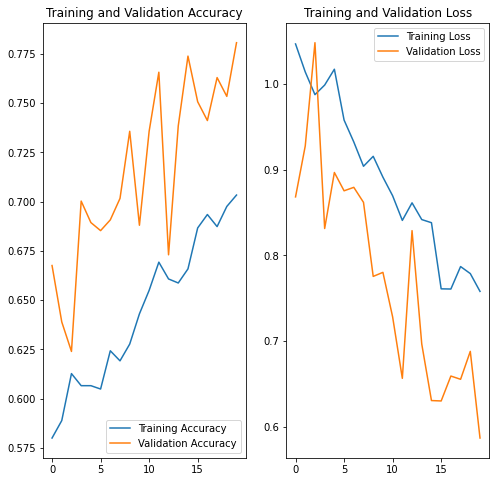

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()